SVD can be applied to ANY real-valued matrix

Single Value Decomposition is a mathematical technique used to break down a matrix into three separate matrices, which can help us understand and analyze the original matrix in a simpler way. Let's go through the process step by step.

First, let's imagine we have a rectangular matrix, which is essentially a grid of numbers arranged in rows and columns. The SVD breaks down this matrix into three separate matrices: U, Σ, and V.

1. The matrix U represents the left singular vectors. It contains information about the relationships and patterns within the rows of the original matrix. (eigenvectors)

2. The matrix Σ is a diagonal matrix that contains the singular values. Singular values tell us about the importance or significance of each pattern or relationship found in the original matrix. The diagonal elements of Σ are the singular values, ordered from largest to smallest.(eigenvalues)

3. The matrix V represents the right singular vectors. It contains information about the relationships and patterns within the columns of the original matrix.(eigenvectors)

M = U * Σ * V^T

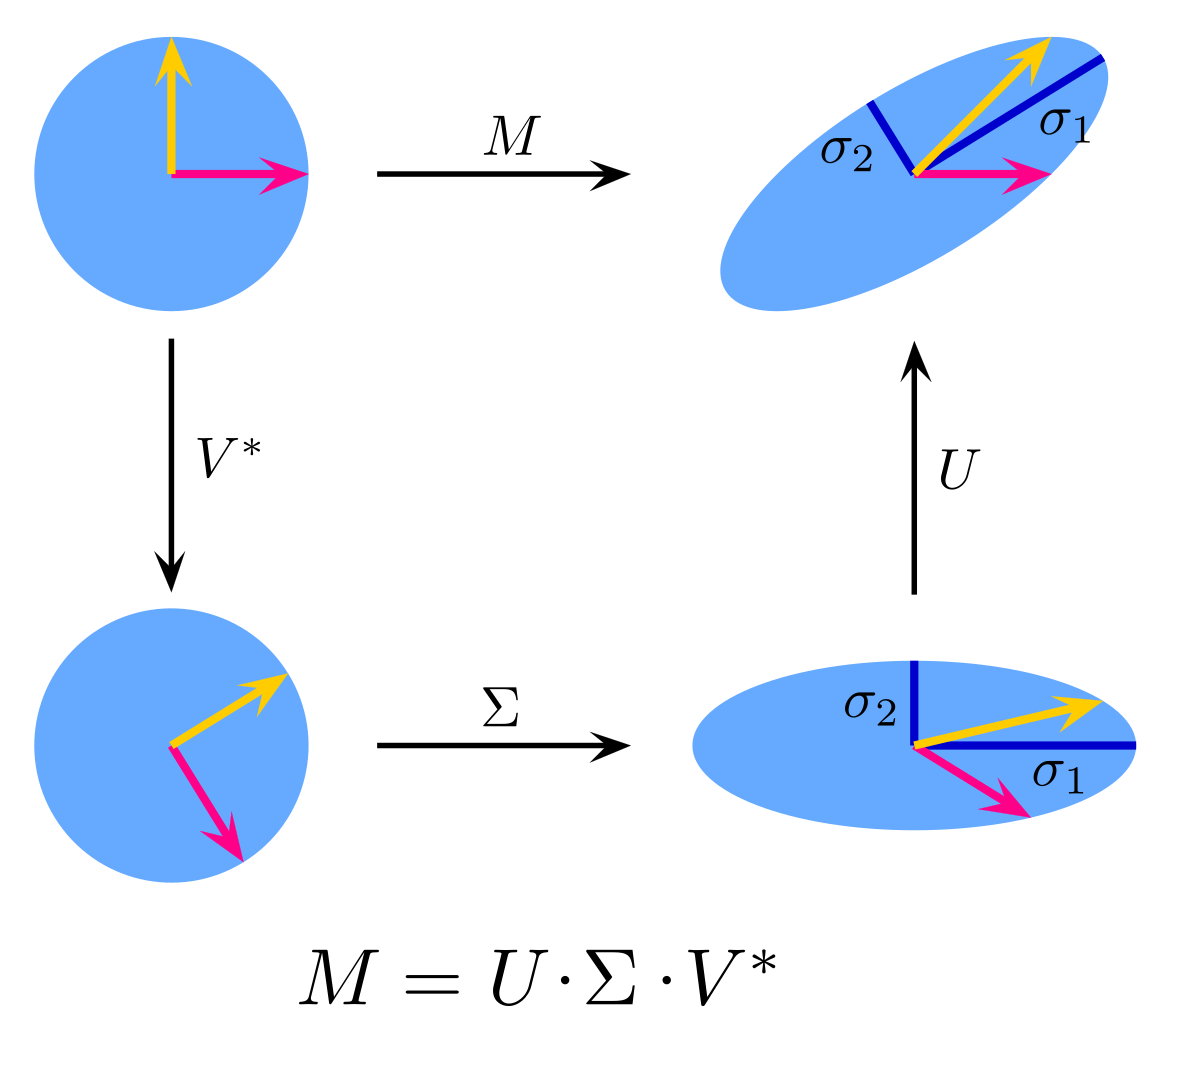

original matrix = left singular matrix * diagonal singular matrix * the transpose of the right singular matrix

The SVD decomposition has several useful applications. One of the main applications is dimensionality reduction. By using SVD, we can identify the most important patterns or relationships in the original matrix based on the singular values. We can then discard the less important singular values and their corresponding columns in U and V. This allows us to represent the matrix with fewer dimensions while retaining the most significant information

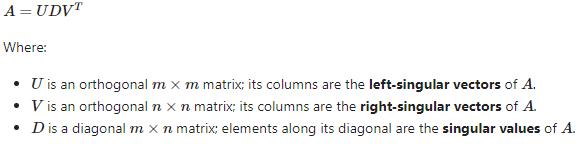

In [1]:
import numpy as np

In [2]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [3]:
U, d, VT = np.linalg.svd(A) # V is already transposed

In [4]:
U # Left singular vectors of A

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [6]:
VT # Transpose of the right-singular vectors of A

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [7]:
d

array([8.66918448, 4.10429538])

In [10]:
np.diag(d) # diagonal matrix of singular values of A

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

D must have the same dimensions as A for matrix multiplication to be possible

In [11]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [12]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD and eigendecomposition are closely related to each other:

- Left Singular vectors of A = eigenvectors of AAtransposed
- Right Singular vectors of A = eigenvectors of AtransposedA
- Non Zero singular values of A = square roots of eigenvectors of AAtransposed = square roots of eigenvectors of AtransposedA

## Image Compression via SVD

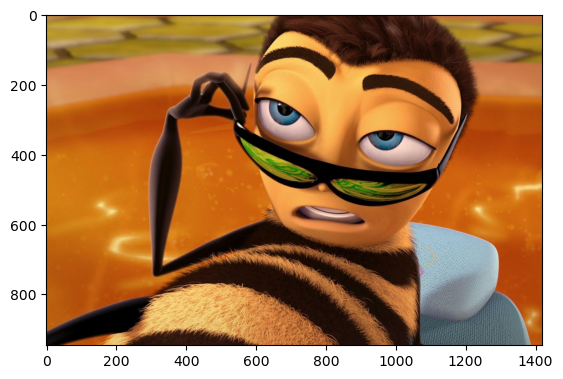

In [26]:
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt

image_url = "https://pyxis.nymag.com/v1/imgs/611/c62/88c23f4f71eb9bf14fb03ec790f0c3b07e-09-bee-movie.2x.h473.w710.jpg"
file_name = "do-you-like-jazz.jpg"

# Download the image using curl
urllib.request.urlretrieve(image_url, file_name)

img = Image.open(file_name)
_ = plt.imshow(img)


Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels:

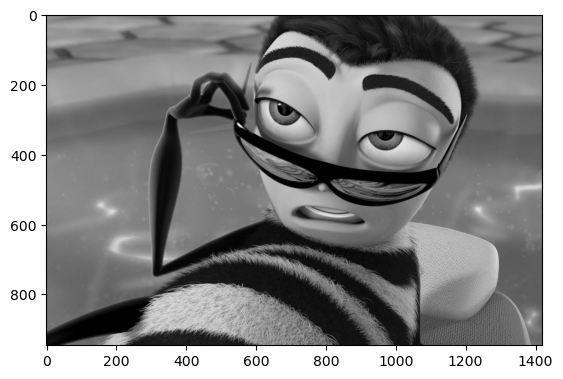

In [27]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convert data into numpy matrix, which doesn't impact image data:

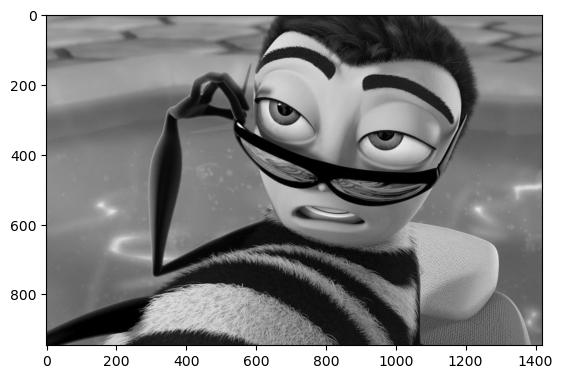

In [28]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calculate SVD of the image:

In [29]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag(eigenvalues
) so too are singular values, by convention, arranged in descending order in D. Thus, the first left-singular vector of  U and first right-singular vector of V may represent the most prominent feature of the image:

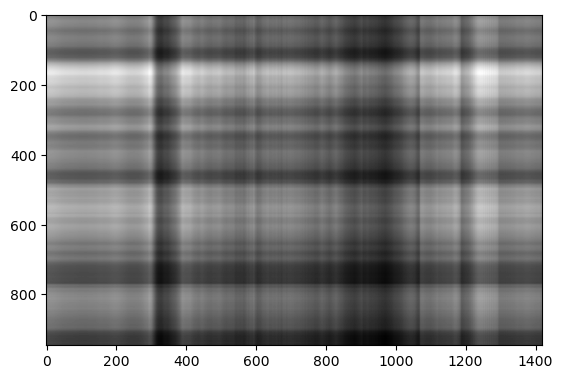

In [30]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Additional singular vectors improve the image quality:

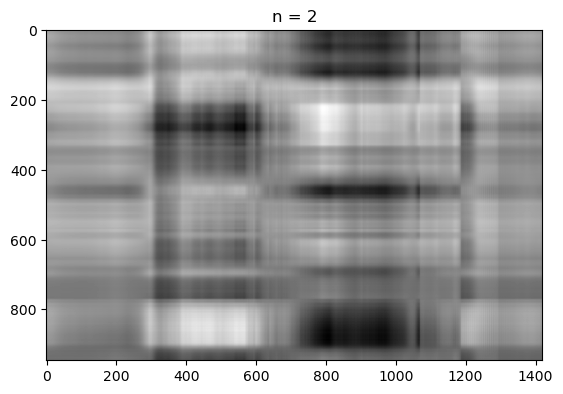

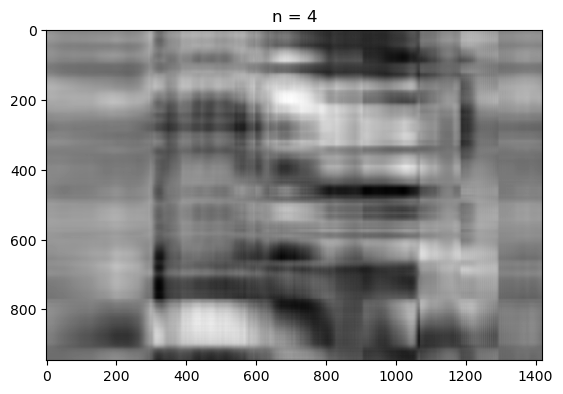

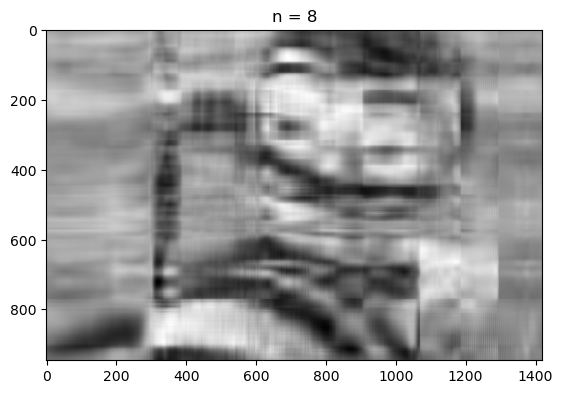

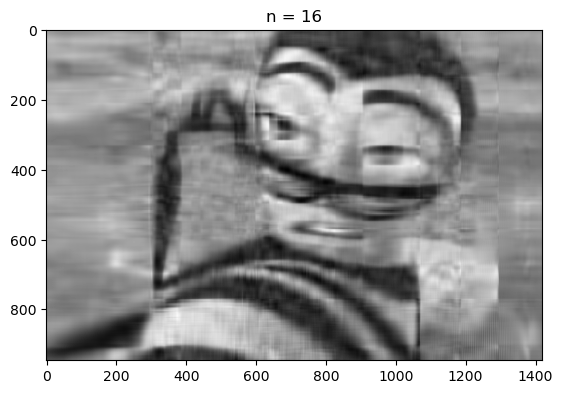

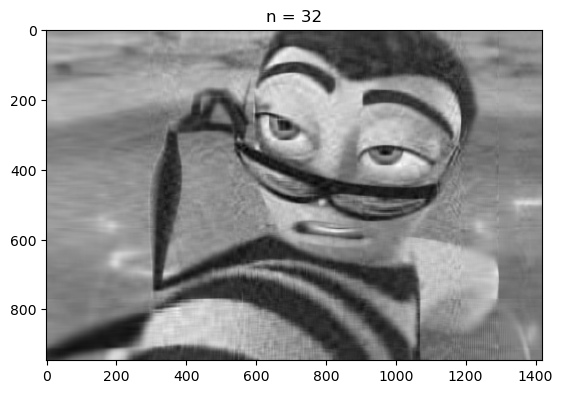

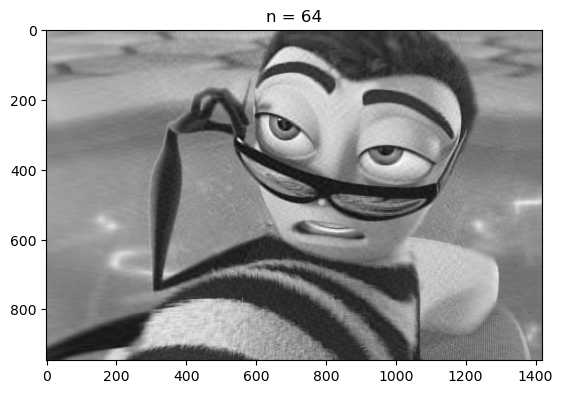

In [40]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [32]:
imgmat.shape

(946, 1420)

In [34]:
full_representation = 946*1420
full_representation

1343320

In [35]:
svd64_rep = 64*946 + 64 + 64*1420
svd64_rep

151488

In [36]:
svd64_rep/full_representation

0.11277134264359943

Specifically, the image represented as 64 singular vectors is 11.2% of the size of the original!

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.